In [1]:
from Bio.PDB import PDBParser
import numpy as np
import glob, os
import matplotlib.pyplot as plt


In [2]:
# read all pdb files in a directory
pdb_files = []
for file in os.listdir(".\Supplementary_full"):
    if file.endswith(".pdb"):
        pdb_files.append(os.path.join(".\Supplementary_full", file))

In [157]:
len(pdb_files)

200

In [158]:
os.path.splitext(os.path.basename(pdb_files[0]))

('1axe', '.pdb')

In [159]:
with open(pdb_files[0], "r") as f:
    lines = f.readlines();
len(lines)

6553

In [160]:
Helix_index = [1,5]
HELIX = {
    1 : "Right-handed alpha      ",
    5 : "Right-handed 310        "
}
HELIX_length = {
    1 : 0,
    5 : 0
}
SHEET_length = 0
total_length = 0

In [161]:
for pdb_file in pdb_files:
    with open(pdb_file, "r") as f:
        lines = f.readlines();
        for line in lines:
            if line[:5]=="HELIX":
                length = int(line[71:76])
                helix_type = int(line[38:40])
                if helix_type in Helix_index:
                    HELIX_length[helix_type] += length
                total_length += length  
            if line[:5]=="SHEET":
                length = int(line[33:37])-int(line[22:26])
                SHEET_length += length
                total_length += length

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\a1085\AppData\Local\Temp\ipykernel_25112\2638424329.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\IPython\core\interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\IPython\core\ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\IPython\core\ultratb.py", line 1199, in structured_traceback
  

In [ ]:
HELIX_length

{1: 28200, 5: 15800, 6: 0}

In [ ]:
total_length

220

In [ ]:
SHEET_length

134

In [ ]:
total_length

354

In [ ]:
for key in HELIX_length:
    HELIX_length[key] /= total_length
SHEET_length /= total_length

In [ ]:
print("Secondary structure     Abundance")
for key in HELIX_length:
    print(HELIX[key], HELIX_length[key])
print("SHEET                   ", SHEET_length)

Secondary structure     Abundance
Right-handed alpha       0.6588947402923759
Right-handed 310         0.07263509822345562
SHEET                    0.2684701614841684


In [ ]:
Helix_index = [1,5]
HELIX = {
    1 : "Right-handed alpha      ",
    5 : "Right-handed 310        "
}
HELIX_length = {
    1 : 0,
    5 : 0
}
SHEET_length = 0
total_length = 0
for pdb_file in pdb_files:
    with open(pdb_file, "r") as f:
        lines = f.readlines();
        # all helix length of a pdb file
        for line in lines:
            if line[:5]=="HELIX":
                length = int(line[71:76])
                helix_type = int(line[38:40])
                if helix_type in Helix_index:
                    HELIX_length[helix_type] += length
                total_length += length       
        # all sheet length of a pdb file
        for line in lines:
            if line[:5]=="SHEET":
                length = int(line[33:37])-int(line[22:26])+1
                SHEET_length += length
                total_length += length
# Calculate the relativ length
for key in HELIX_length:
    HELIX_length[key] /= total_length
SHEET_length /= total_length
# Print the result
print("Secondary structure     Abundance")
for key in HELIX_length:
    print(HELIX[key], HELIX_length[key])
print("SHEET                   ", SHEET_length)

Secondary structure     Abundance
Right-handed alpha       0.619960112671423
Right-handed 310         0.06834303102576228
SHEET                    0.31169685630281474


In [ ]:
from Bio import SeqIO
alphabet = [chr(i) for i in range(65, 65+26)]
counter = 0
chains = {}
for record in SeqIO.parse(pdb_files[0], "pdb-seqres"):
    chains[alphabet[counter]] = record.seq
    counter += 1

In [ ]:
chains

{'A': Seq('STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVS...LTF'),
 'B': Seq('STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVS...LTF')}

In [ ]:
chains['A'][10]

'A'

In [ ]:
# from Bio.SeqUtils import seq1

# pdbparser = PDBParser()

# structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_files[0])), pdb_files[0])
# chains = {chain.id:seq1(''.join(residue.resname for residue in chain)) for chain in structure.get_chains()}

# chains

c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6214.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6266.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6318.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6379.
  warnings.warn(


{'A': 'STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVSGTLVTPLPVIAGHEAAGIVESIGEGVTTVRPGDKVIPLWTPQCGKCRVCKHPEGNFCLKNDLSMPRGTMQDGTSRFTCRGKPIHHFLGTSTFSQYTVVDEISVAKIDAASPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGVGLSVIMGCKAAGAARIIGVDINKDKFAKAKEVGATECVNPQDYKKPIQEVLTEMSNGGVDFSFEVIGRLDTMVTALSCCQEAYGVSVIVGVPPDSQNLSMNPMLLLSGRTWKGAIFGGFKSKDSVPKLVADFMAKKFALDPLITHVLPFEKINEGFDLLRSGESIRTILTFXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX',
 'B': 'STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGICRSDDHVVSGTLVTPLPVIAGHEAAGIVESIGEGVTTVRPGDKVIPLWTPQCGKCRVCKHPEGNFCLKNDLSMPRGTMQDGTSRFTCRGKPIHHFLGTSTFSQYTVVDEISVAKIDAASPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGVGLSVIMGCKAAGAARIIGVDINKDKFAKAKEVGATECVNPQDYKKPIQEVLTEMSNGGVDFSFEVIGRLDTMVTALSCCQEAYGVSVIVGVPPDSQNLSMNPMLLLSGRTWKGAIFGGFKSKDSVPKLVADFMAKKFALDPLITHVLPFEKINEGFDLLRSGESIRTILTFXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'}

In [ ]:
amino_acids = ["ALA", "ARG", "ASN", "ASP", "CYS", "GLU", "GLN", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
len(amino_acids)

20

In [ ]:
# alphabet = [chr(i) for i in range(65, 65+26)]
amino_acids = ["ALA", "ARG", "ASN", "ASP", "CYS", "GLU", "GLN", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
HELIX_aa_counter = {}
SHEET_aa_counter = {}
for i in range(len(amino_acids)):
    HELIX_aa_counter[amino_acids[i]] = 0
    SHEET_aa_counter[amino_acids[i]] = 0
for pdb_file in pdb_files:
    counter = 0
    # for record in SeqIO.parse(pdb_file, "pdb-seqres"):
    #     chains[alphabet[counter]] = record.seq
    #     counter += 1
    pdbparser = PDBParser()
    structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_file)), pdb_file)
    chains = {chain.id: [residue.get_resname() for residue in chain.get_residues()] for chain in structure.get_chains()}
    with open(pdb_file, "r") as f:
        lines = f.readlines();
        for line in lines:
            if (line[:5]=="HELIX"):
                if int(line[38:40])==1:
                    chain = line[19] 
                    start = int(line[21:25])-1
                    end = int(line[33:37])
                    for aa in chains[chain][start:end]:
                        if aa in amino_acids:
                            HELIX_aa_counter[aa] += 1
            if (line[:5]=="SHEET"):
                chain = line[21] 
                start = int(line[22:26])-1
                end = int(line[33:37])
                for aa in chains[chain][start:end]:
                    if aa in amino_acids:
                        SHEET_aa_counter[aa] += 1


c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6214.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6266.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6318.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6379.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7465.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WAR

In [ ]:
total_aa_helix = 0
for aa in amino_acids:
    total_aa_helix += HELIX_aa_counter[aa]
for aa in amino_acids:
    HELIX_aa_counter[aa] /= total_aa_helix 

In [ ]:
total_aa_sheet = 0
for aa in amino_acids:
    total_aa_sheet += SHEET_aa_counter[aa]
for aa in amino_acids:
    SHEET_aa_counter[aa] /= total_aa_sheet 

In [ ]:
for aa in amino_acids:
    print(aa+" & ", end="")
    print("{:.3f}".format(HELIX_aa_counter[aa]), end=" & ")
    print(aa+" & ", end="")
    print("{:.3f}".format(SHEET_aa_counter[aa]), end="\\\\ \n")

ALA & 0.105 & ALA & 0.068\\ 
ARG & 0.055 & ARG & 0.048\\ 
ASN & 0.037 & ASN & 0.039\\ 
ASP & 0.049 & ASP & 0.049\\ 
CYS & 0.012 & CYS & 0.022\\ 
GLU & 0.071 & GLU & 0.050\\ 
GLN & 0.038 & GLN & 0.032\\ 
GLY & 0.065 & GLY & 0.071\\ 
HIS & 0.021 & HIS & 0.022\\ 
ILE & 0.060 & ILE & 0.071\\ 
LEU & 0.108 & LEU & 0.093\\ 
LYS & 0.056 & LYS & 0.053\\ 
MET & 0.028 & MET & 0.023\\ 
PHE & 0.042 & PHE & 0.049\\ 
PRO & 0.032 & PRO & 0.031\\ 
SER & 0.058 & SER & 0.060\\ 
THR & 0.044 & THR & 0.068\\ 
TRP & 0.014 & TRP & 0.014\\ 
TYR & 0.034 & TYR & 0.039\\ 
VAL & 0.071 & VAL & 0.100\\ 


In [ ]:
from Bio.PDB import PDBParser
pdbparser = PDBParser()
structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_files[0])), pdb_files[0])
chains = {chain.id:chain for chain in structure.get_chains()}
print(chains)


{'A': <Chain id=A>, 'B': <Chain id=B>}


c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6214.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6266.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6318.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6379.
  warnings.warn(


In [ ]:
pdbparser = PDBParser()
structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_files[0])), pdb_files[0])
chains = {chain.id: [residue.get_resname() for residue in chain.get_residues()] for chain in structure.get_chains()}
print(chains)

{'A': ['SER', 'THR', 'ALA', 'GLY', 'LYS', 'VAL', 'ILE', 'LYS', 'CYS', 'LYS', 'ALA', 'ALA', 'VAL', 'LEU', 'TRP', 'GLU', 'GLU', 'LYS', 'LYS', 'PRO', 'PHE', 'SER', 'ILE', 'GLU', 'GLU', 'VAL', 'GLU', 'VAL', 'ALA', 'PRO', 'PRO', 'LYS', 'ALA', 'HIS', 'GLU', 'VAL', 'ARG', 'ILE', 'LYS', 'MET', 'VAL', 'ALA', 'THR', 'GLY', 'ILE', 'CYS', 'ARG', 'SER', 'ASP', 'ASP', 'HIS', 'VAL', 'VAL', 'SER', 'GLY', 'THR', 'LEU', 'VAL', 'THR', 'PRO', 'LEU', 'PRO', 'VAL', 'ILE', 'ALA', 'GLY', 'HIS', 'GLU', 'ALA', 'ALA', 'GLY', 'ILE', 'VAL', 'GLU', 'SER', 'ILE', 'GLY', 'GLU', 'GLY', 'VAL', 'THR', 'THR', 'VAL', 'ARG', 'PRO', 'GLY', 'ASP', 'LYS', 'VAL', 'ILE', 'PRO', 'LEU', 'TRP', 'THR', 'PRO', 'GLN', 'CYS', 'GLY', 'LYS', 'CYS', 'ARG', 'VAL', 'CYS', 'LYS', 'HIS', 'PRO', 'GLU', 'GLY', 'ASN', 'PHE', 'CYS', 'LEU', 'LYS', 'ASN', 'ASP', 'LEU', 'SER', 'MET', 'PRO', 'ARG', 'GLY', 'THR', 'MET', 'GLN', 'ASP', 'GLY', 'THR', 'SER', 'ARG', 'PHE', 'THR', 'CYS', 'ARG', 'GLY', 'LYS', 'PRO', 'ILE', 'HIS', 'HIS', 'PHE', 'LEU', 'GLY',

c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6214.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6266.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6318.
  warnings.warn(
c:\Users\a1085\miniconda3\envs\py3113\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6379.
  warnings.warn(


In [ ]:
for residues in chains["A"].get_residues():
    for atom in residues.get_atoms():
        print(atom.get_name())
        print([id for id in atom.get_full_id()])

N
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('N', ' ')]
CA
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('CA', ' ')]
C
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('C', ' ')]
O
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('O', ' ')]
CB
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('CB', ' ')]
OG
[('1axe', '.pdb'), 0, 'A', (' ', 1, ' '), ('OG', ' ')]
N
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('N', ' ')]
CA
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('CA', ' ')]
C
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('C', ' ')]
O
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('O', ' ')]
CB
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('CB', ' ')]
OG1
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('OG1', ' ')]
CG2
[('1axe', '.pdb'), 0, 'A', (' ', 2, ' '), ('CG2', ' ')]
N
[('1axe', '.pdb'), 0, 'A', (' ', 3, ' '), ('N', ' ')]
CA
[('1axe', '.pdb'), 0, 'A', (' ', 3, ' '), ('CA', ' ')]
C
[('1axe', '.pdb'), 0, 'A', (' ', 3, ' '), ('C', ' ')]
O
[('1axe', '.pdb'), 0, 'A', (' ', 3, ' '), ('O', ' ')]
CB
[('1axe', '.pdb'), 0, 'A'

In [ ]:
Helices = []
with open(pdb_files[0], "r") as f:
    lines = f.readlines();
    for line in lines:
        if (line[:5]=="HELIX"):
            if int(line[38:40])==1:
                chain = line[19] 
                start = int(line[21:25])-1
                end = int(line[33:37])
                Helices.append((chain, start, end))

In [ ]:
distances = []
o_coord = {}
n_coord = {}
for chain_id in chains:
    aa_counter = 0
    n_coord[chain_id] = []
    o_coord[chain_id] = []
    for residue in chains[chain_id].get_residues():
        atom_counter = 0
        for atom in residue.get_atoms():
            if (atom.get_name()=="N") & (atom_counter==0):
                n_coord[chain_id].append(atom.get_coord())
            if (atom.get_name()=="O") & (atom_counter==3):
                o_coord[chain_id].append(atom.get_coord())
            atom_counter += 1



In [ ]:
for chain_id in chains:
    chain_length = len(o_coord[chain_id])
    for i in range(chain_length):
        if (i+4)>=chain_length:
            break
        else:
            o = o_coord[chain_id][i]
            n = n_coord[chain_id][i+4]
            square_distance = 0
            for j in range(len(o)):
                square_distance += (n[j]-o[j])**2
            distances.append(np.sqrt(square_distance))

(array([0.20184264, 0.05337185, 0.05143106, 0.08345417, 0.070839  ,
        0.08345417, 0.10480291, 0.17273072, 0.17273072, 0.08248377]),
 array([ 2.5832833 ,  3.51166687,  4.44005045,  5.36843402,  6.29681759,
         7.22520116,  8.15358473,  9.0819683 , 10.01035187, 10.93873544,
        11.86711902]),
 <BarContainer object of 10 artists>)

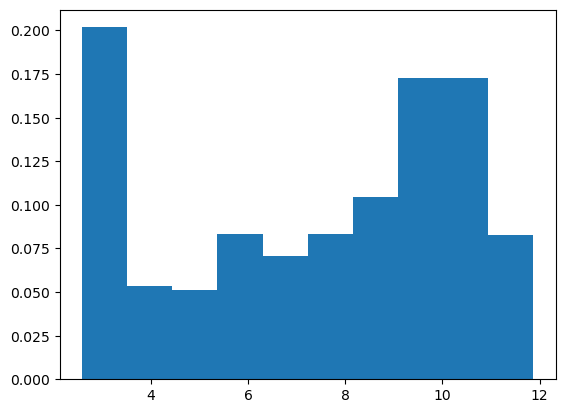

In [ ]:
plt.hist(distances, density=True)

In [ ]:
distance_helices = []
for (chain_id, start, end) in Helices:
    if start+4 >= end:
        continue
    else:
        for i in range(start, end-4):
            o = o_coord[chain_id][i]
            n = n_coord[chain_id][i+4]
            square_distance = 0
            for j in range(len(o)):
                square_distance += (n[j]-o[j])**2
            distance_helices.append(np.sqrt(square_distance))


(array([1.57252737, 0.78626368, 0.26208789, 0.07488226, 0.11232338,
        0.11232338, 0.03744113, 0.        , 0.        , 0.07488226]),
 array([2.73467215, 3.06440792, 3.39414369, 3.72387945, 4.05361522,
        4.38335099, 4.71308676, 5.04282253, 5.37255829, 5.70229406,
        6.03202983]),
 <BarContainer object of 10 artists>)

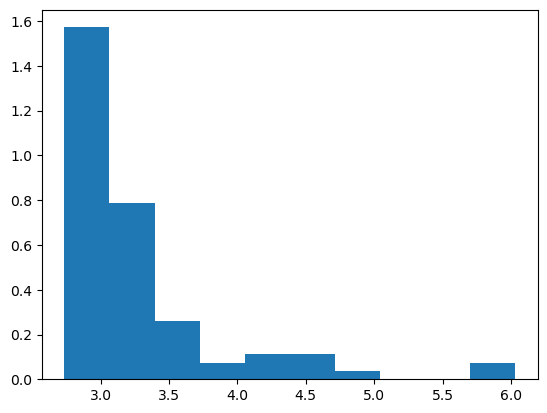

In [ ]:
plt.hist(distance_helices, density =True)

In [ ]:
for residues in chains["A"].get_residues():
    for atom in residues.get_atoms():
        print(atom.get_name())
        print(atom.get_coord())
    break

N
[-22.517 -14.59   51.931]
CA
[-22.742 -14.61   50.448]
C
[-22.189 -13.325  49.817]
O
[-21.945 -12.342  50.518]
CB
[-24.233 -14.77   50.128]
OG
[-24.429 -15.083  48.759]


In [12]:
import warnings
warnings.filterwarnings("ignore")
amino_acids = ["ALA", "ARG", "ASN", "ASP", "CYS", "GLU", "GLN", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
distances = []
distance_helices = []
for pdb_file in pdb_files:
    pdbparser = PDBParser()
    print(pdb_file)
    structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_file)), pdb_file)
    chains = {chain.id:chain for chain in structure.get_chains()}
    Helices = []
    with open(pdb_file, "r") as f:
        lines = f.readlines();
        for line in lines:
            if (line[:5]=="HELIX"):
                if int(line[38:40])==1:
                    chain = line[19] 
                    start = int(line[21:25])
                    end = int(line[33:37])
                    Helices.append((chain, start, end))
    o_coord = {}
    o_coord_all = {}
    n_coord = {}
    n_coord_all = {}
    for chain_id in chains:
        aa_counter = 0
        n_coord_all[chain_id] = []
        n_coord[chain_id] = {}
        o_coord_all[chain_id] = []
        o_coord[chain_id] = {}
        for residue in chains[chain_id].get_residues():
            # if residue.get_resname() in amino_acids:
                atom_counter = 0
                n_index = -1
                o_index = -1
                for atom in residue.get_atoms():
                    if (atom.get_name()=="N" and n_index==-1):
                        n_index = atom_counter
                        n_coord[chain_id][residue.id[1]] = atom.get_coord()
                        n_coord_all[chain_id].append(atom.get_coord())
                    if (atom.get_name()=="O" and o_index==-1):
                        o_index = atom_counter
                        o_coord[chain_id][residue.id[1]] = atom.get_coord()
                        o_coord_all[chain_id].append(atom.get_coord())
                if n_index == -1:
                    n_coord[chain_id][residue.id[1]] = []
                    n_coord_all[chain_id].append([])
                if o_index == -1:
                    o_coord[chain_id][residue.id[1]] = []
                    o_coord_all[chain_id].append([])
    for chain_id in chains:
        chain_length = len(o_coord_all[chain_id])
        for i in range(chain_length):
            if (i+4)>=chain_length:
                break
            else:
                o = o_coord_all[chain_id][i]
                n = n_coord_all[chain_id][i+4]
                if o==[] or n==[]:
                    continue
                square_distance = 0
                for j in range(len(o)):
                    square_distance += (n[j]-o[j])**2
                distances.append(np.sqrt(square_distance))
    for (chain_id, start, end) in Helices:
        if start+4 >= end:
            continue
        else:
            try:
                # To avoid missing index (like 1w2p chain A id 346 is missing), 
                # amino acid other than 20 amino acids we know and other problems
                # just ignor the errors
                for i in range(start, end-4):
                    o = o_coord[chain_id][i]
                    n = n_coord[chain_id][i+4]
                    if o==[] or n==[]:
                        continue
                    square_distance = 0
                    for j in range(len(o)):
                        square_distance += (n[j]-o[j])**2
                    distance_helices.append(np.sqrt(square_distance))
            except:
                continue

.\Supplementary_full\1axe.pdb
.\Supplementary_full\1b35.pdb
.\Supplementary_full\1bgo.pdb
.\Supplementary_full\1crg.pdb
.\Supplementary_full\1d29.pdb
.\Supplementary_full\1d90.pdb
.\Supplementary_full\1f16.pdb
.\Supplementary_full\1f1v.pdb
.\Supplementary_full\1fzg.pdb
.\Supplementary_full\1gvk.pdb
.\Supplementary_full\1h89.pdb
.\Supplementary_full\1hj9.pdb
.\Supplementary_full\1iqe.pdb
.\Supplementary_full\1j2j.pdb
.\Supplementary_full\1kg6.pdb
.\Supplementary_full\1n3j.pdb
.\Supplementary_full\1n5i.pdb
.\Supplementary_full\1pa1.pdb
.\Supplementary_full\1pf8.pdb
.\Supplementary_full\1r4o.pdb
.\Supplementary_full\1rzh.pdb
.\Supplementary_full\1s20.pdb
.\Supplementary_full\1smu.pdb
.\Supplementary_full\1szl.pdb
.\Supplementary_full\1th2.pdb
.\Supplementary_full\1to2.pdb
.\Supplementary_full\1u3a.pdb
.\Supplementary_full\1u54.pdb
.\Supplementary_full\1u9j.pdb
.\Supplementary_full\1up6.pdb
.\Supplementary_full\1v1a.pdb
.\Supplementary_full\1v3e.pdb
.\Supplementary_full\1vl0.pdb
.\Suppleme

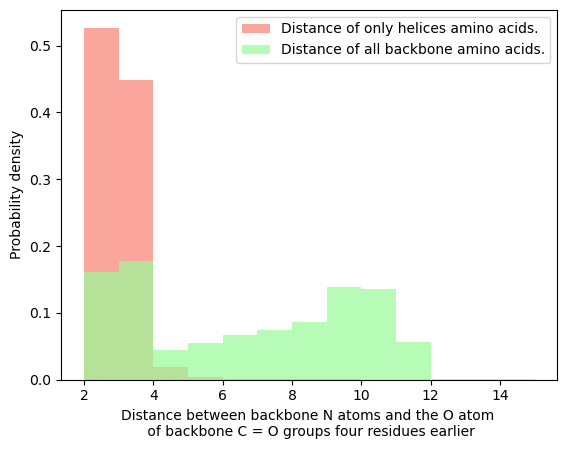

In [27]:
plt.hist(distance_helices, bins=[i for i in np.arange(2,16,1)],density=True, label="Distance of only helices amino acids.", color='salmon', alpha=0.7)
plt.hist(distances,bins=[i for i in np.arange(2,16,1)],density=True, label="Distance of all backbone amino acids.", color='palegreen', alpha=0.7)
plt.xlabel("Distance between backbone N atoms and the O atom \n of backbone C = O groups four residues earlier")
plt.ylabel("Probability density")
plt.legend()

(array([48104., 14167., 20157., 32180., 27265.,   323.,   168.,    82.]),
 array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <BarContainer object of 8 artists>)

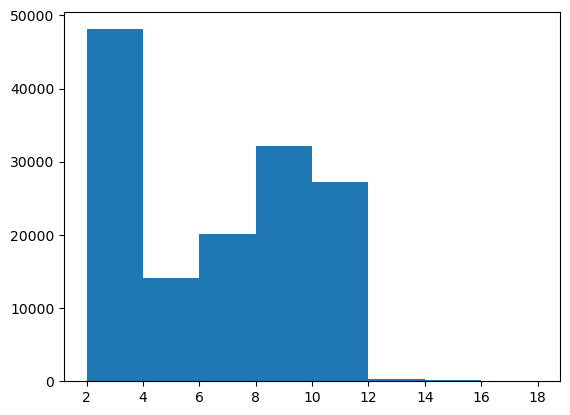

In [15]:
plt.hist(distances,bins=[i for i in np.arange(2,20,2)])

In [9]:
o_coord["A"]

{2: array([91.358, 76.376, 80.721], dtype=float32),
 3: array([92.788, 76.187, 76.096], dtype=float32),
 4: array([96.273, 76.28 , 75.82 ], dtype=float32),
 5: array([98.643, 75.221, 74.065], dtype=float32),
 6: array([101.168,  76.741,  76.194], dtype=float32),
 7: array([99.831, 74.969, 78.874], dtype=float32),
 8: array([100.402,  72.084,  77.316], dtype=float32),
 9: array([103.68 ,  72.586,  76.04 ], dtype=float32),
 10: array([104.659,  73.11 ,  79.363], dtype=float32),
 11: array([103.756,  69.941,  80.514], dtype=float32),
 12: array([105.919,  68.631,  78.187], dtype=float32),
 13: array([108.801,  70.437,  78.634], dtype=float32),
 14: array([109.066,  69.852,  81.782], dtype=float32),
 15: array([109.097,  66.4  ,  81.309], dtype=float32),
 16: array([111.421,  66.274,  79.149], dtype=float32),
 17: array([113.767,  68.12 ,  81.014], dtype=float32),
 18: array([112.756,  65.68 ,  84.035], dtype=float32),
 19: array([113.765,  62.896,  80.264], dtype=float32),
 20: array([116

In [ ]:
Helices

[('A', 4, 19),
 ('A', 22, 39),
 ('A', 48, 58),
 ('A', 85, 105),
 ('A', 119, 130),
 ('A', 179, 189),
 ('A', 208, 216),
 ('A', 223, 242),
 ('A', 245, 253),
 ('A', 273, 290),
 ('A', 306, 318),
 ('A', 322, 332),
 ('B', 4, 18),
 ('B', 22, 39),
 ('B', 48, 58),
 ('B', 85, 105),
 ('B', 120, 129),
 ('B', 179, 190),
 ('B', 208, 216),
 ('B', 223, 242),
 ('B', 245, 253),
 ('B', 273, 290),
 ('B', 305, 318),
 ('B', 322, 332),
 ('C', 4, 18),
 ('C', 22, 39),
 ('C', 48, 58),
 ('C', 85, 105),
 ('C', 120, 130),
 ('C', 179, 190),
 ('C', 208, 216),
 ('C', 223, 242),
 ('C', 245, 253),
 ('C', 273, 290),
 ('C', 305, 318),
 ('C', 322, 334),
 ('D', 4, 18),
 ('D', 22, 39),
 ('D', 48, 58),
 ('D', 85, 105),
 ('D', 119, 130),
 ('D', 179, 189),
 ('D', 208, 216),
 ('D', 223, 242),
 ('D', 245, 253),
 ('D', 273, 290),
 ('D', 304, 315),
 ('D', 322, 332),
 ('E', 4, 18),
 ('E', 22, 39),
 ('E', 48, 58),
 ('E', 85, 105),
 ('E', 119, 129),
 ('E', 179, 190),
 ('E', 208, 216),
 ('E', 223, 242),
 ('E', 245, 253),
 ('E', 273, 29

In [ ]:
import warnings
warnings.filterwarnings("ignore")
amino_acids = ["ALA", "ARG", "ASN", "ASP", "CYS", "GLU", "GLN", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
pdbparser = PDBParser()
for pdb_file in pdb_files:
    n_coord = {}
    o_crood = {}
    structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_file)), pdb_file)
    chains = {chain.id:chain for chain in structure.get_chains()}
    for chain_id in chains:
        aa_counter = 0
        n_coord[chain_id] = {}
        o_coord[chain_id] = {}
        for residue in chains[chain_id].get_residues():
            if residue.get_resname() in amino_acids:
                atom_counter = 0
                n_index = -1
                o_index = -1
                for atom in residue.get_atoms():
                    # if (atom_counter==0):
                    #     if (atom.get_name()=="N"):
                    #         n_coord[chain_id].append(atom.get_coord())
                    #     else:
                    #         n_coord[chain_id].append([])
                    # if(atom_counter==3):
                    #     if(atom.get_name()=="O"):
                    #         o_coord[chain_id].append(atom.get_coord())
                    #     else:
                    #         o_coord[chain_id].append([])
                    # atom_counter += 1
                    if (atom.get_name()=="N"):
                        n_index = atom_counter
                        n_coord[chain_id][residue.id[1]] = atom.get_coord()
                    if (atom.get_name()=="O"):
                        o_index = atom_counter
                        o_coord[chain_id][residue.id[1]] = atom.get_coord()

                if n_index == -1:
                    n_coord[chain_id][residue.id[1]] = None
                if o_index == -1:
                    o_coord[chain_id][residue.id[1]] = None
    for key in n_coord:
        if(len(n_coord[key])!=len(o_coord[key])):
            print(pdb_file)


In [ ]:
structure = pdbparser.get_structure(os.path.splitext(os.path.basename(".\\Supplementary_full\\1hj9.pdb")), ".\\Supplementary_full\\1hj9.pdb")
for chain in structure.get_chains():
    for residue in chain.get_residues():
        if residue.get_resname() in amino_acids:
            print(residue.get_resname())
            atom_counter = 0
            
            for atom in residue.get_atoms():
                if (atom.get_name()=="N") and (atom_counter==0):
                    print(atom.get_coord())
                if (atom.get_name()=="O") and (atom_counter==3):
                    print(atom.get_coord())
                atom_counter += 1
                

ILE
[35.378 20.014 20.072]
[37.763 20.867 18.737]
VAL
[36.518 20.509 16.871]
[36.781 22.173 14.608]
GLY
[39.001 22.15  15.022]
[38.617 25.571 13.941]
GLY
[38.563 24.697 16.05 ]
[40.406 26.572 16.976]
TYR
[38.928 27.308 18.49 ]
[38.439 27.749 21.102]
THR
[40.497 28.479 21.497]
[39.7   30.916 22.866]
CYS
[38.224 29.556 23.849]
[37.599 32.98  24.556]
GLY
[38.516 31.448 25.932]
[36.811 31.985 28.052]
ALA
[38.599 32.186 29.342]
[36.678 33.825 30.815]
ASN
[35.531 31.886 30.936]
[32.701 34.125 30.658]
THR
[34.133 33.382 29.08 ]
[31.626 34.247 26.614]
VAL
[31.943 32.379 27.842]
[29.992 30.121 29.143]
PRO
[29.464 32.278 29.467]
[27.6   30.82  32.235]
TYR
[27.14  30.898 30.006]
[25.559 27.667 29.871]
GLN
[27.65  28.293 29.363]
[28.952 26.634 31.282]
VAL
[27.652 24.987 30.469]
[28.409 22.405 29.965]
SER
[29.129 22.122 32.09 ]
[28.438 20.171 33.951]
LEU
[28.241 18.758 32.212]
[29.259 16.146 32.534]
ASN
[28.51  16.352 34.65 ]
[27.929 14.532 36.796]
SER
[29.276 13.107 35.725]
[30.14   9.889 36.728]


In [ ]:
"M3L" in amino_acids

False

In [ ]:
structure = pdbparser.get_structure(os.path.splitext(os.path.basename(".\\Supplementary_full\\1hj9.pdb")), ".\\Supplementary_full\\1hj9.pdb")
for chain in structure.get_chains():
    for residue in chain.get_residues():
        if residue.get_resname()=="":
            atom_counter = 0
            for atom in residue.get_atoms():
                print(atom_counter, end = " ")
                print(atom.get_name(), end= "    ")
                atom_counter += 1
                
            print()

0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 HA    7 HB2    8 HB3    9 H    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 H1    1 H2    2 HG    3 N    4 CA    5 C    6 O    7 CB    8 SG    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    
0 N    1 CA    2 C    3 O    4 CB    5 SG    6 H    7 HA    8 HB2    9 HB3    


In [ ]:
structure = pdbparser.get_structure(os.path.splitext(os.path.basename(".\\Supplementary_full\\1to2.pdb")), ".\\Supplementary_full\\1to2.pdb")
for chain in structure.get_chains():
    for residue in chain.get_residues():
        if residue.get_resname() in amino_acids:
            print(residue.get_resname())
            atom_counter = 0
            
            for atom in residue.get_atoms():
                if (atom.get_name()=="N") and (atom_counter==0):
                    print(atom.get_coord())
                if (atom.get_name()=="O") and (atom_counter==3):
                    print(atom.get_coord())
                atom_counter += 1
                

ALA
[48.833 50.913 36.679]
[49.416 50.045 34.167]
GLN
[51.21  51.398 34.076]
[53.228 49.618 33.244]
SER
[52.116 49.302 31.303]
[53.118 49.271 28.715]
VAL
[54.858 48.019 29.405]
[56.071 45.913 27.731]
PRO
[54.784 46.987 26.223]
[56.986 46.08  24.774]
TYR
[56.213 43.971 24.883]
[59.399 44.151 23.319]
GLY
[57.365 44.273 22.354]
[59.595 46.36  20.515]
VAL
[58.076 46.941 22.076]
[61.036 48.725 22.491]
SER
[60.203 47.123 23.859]
[63.642 46.428 23.367]
GLN
[61.87  45.305 22.572]
[64.492 44.979 20.196]
ILE
[62.745 46.434 20.192]
[64.916 49.182 19.185]
LYS
[64.388 48.299 21.209]
[65.583 51.536 22.377]
ALA
[63.5   50.799 22.004]
[63.442 53.908 23.731]
PRO
[63.209 51.888 24.701]
[64.995 54.053 26.886]
ALA
[65.832 52.715 25.272]
[67.666 55.774 25.32 ]
LEU
[66.099 55.075 23.826]
[65.411 58.392 24.763]
HIS
[64.087 56.58  25.065]
[64.076 58.796 27.777]
SER
[65.186 56.826 27.65 ]
[67.488 59.019 29.322]
GLN
[67.358 58.465 27.106]
[67.896 61.981 26.484]
GLY
[65.99  60.816 26.764]
[63.678 63.201 25.356]


In [11]:
structure = pdbparser.get_structure(os.path.splitext(os.path.basename(".\\Supplementary_full\\1w2p.pdb")), ".\\Supplementary_full\\1w2p.pdb")
atom_counter = 0
for chain in structure.get_chains():
    for residue in chain.get_residues():        
        print(atom_counter, end = " ")
        print(residue.get_resname(), end= " ")
        print(residue.id[1], end="    ")
        atom_counter += 1
        if atom_counter%20==0:
            print()
    print()
    print()
    

0 GLY 1    1 LEU 2    2 ALA 3    3 SER 4    4 LEU 5    5 ALA 6    6 ASP 7    7 PHE 8    8 PRO 9    9 ILE 10    10 GLY 11    11 VAL 12    12 ALA 13    13 VAL 14    14 ALA 15    15 ALA 16    16 SER 17    17 GLY 18    18 GLY 19    19 ASN 20    
20 ALA 21    21 ASP 22    22 ILE 23    23 PHE 24    24 THR 25    25 SER 26    26 SER 27    27 ALA 28    28 ARG 29    29 GLN 30    30 ASN 31    31 ILE 32    32 VAL 33    33 ARG 34    34 ALA 35    35 GLU 36    36 PHE 37    37 ASN 38    38 GLN 39    39 ILE 40    
40 THR 41    41 ALA 42    42 GLU 43    43 ASN 44    44 ILE 45    45 MET 46    46 LYS 47    47 MET 48    48 SER 49    49 TYR 50    50 MET 51    51 TYR 52    52 SER 53    53 GLY 54    54 SER 55    55 ASN 56    56 PHE 57    57 SER 58    58 PHE 59    59 THR 60    
60 ASN 61    61 SER 62    62 ASP 63    63 ARG 64    64 LEU 65    65 VAL 66    66 SER 67    67 TRP 68    68 ALA 69    69 ALA 70    70 GLN 71    71 ASN 72    72 GLY 73    73 GLN 74    74 THR 75    75 VAL 76    76 HIS 77    77 GLY 78    78

In [ ]:
amino_acids = ["ALA", "ARG", "ASN", "ASP", "CYS", "GLU", "GLN", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO", "SER", "THR", "TRP", "TYR", "VAL"]
pdbparser = PDBParser()
for pdb_file in pdb_files:
    n_coord = {}
    o_crood = {}
    structure = pdbparser.get_structure(os.path.splitext(os.path.basename(pdb_file)), pdb_file)
    chains = {chain.id:chain for chain in structure.get_chains()}
    for chain_id in chains:
        aa_counter = 0
        n_coord[chain_id] = []
        o_coord[chain_id] = []
        for residue in chains[chain_id].get_residues():
            if residue.get_resname() in amino_acids:
                n_count = 0
                for atom in residue.get_atoms():
                    if atom.get_name()=="O":
                        n_count += 1
                if n_count > 1:
                    print(pdb_file)
                    print(residue.get_resname())

In [ ]:
structure = pdbparser.get_structure(os.path.splitext(os.path.basename(".\\Supplementary_full\\1to2.pdb")), ".\\Supplementary_full\\1to2.pdb")
for chain in structure.get_chains():
    for residue in chain.get_residues():
        if residue.get_resname()=="MET":
            atom_counter = 0
            for atom in residue.get_atoms():
                print(atom_counter, end = " ")
                print(atom.get_name(), end= "    ")
                atom_counter += 1
                
            print()

In [29]:
pdb_files[0][-4:]

'.pdb'